In [1]:
from pathlib import Path
import imghdr
import os

data_dir = "hair_types"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

/var/folders/_2/9tdd0_v908qf2_1bw_19j5wr0000gn/T/ipykernel_27410/1025810437.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

image_size = (64, 64)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size, 
    labels='inferred',
    label_mode='categorical'
)

Found 985 files belonging to 3 classes.
Using 788 files for training.
Found 985 files belonging to 3 classes.
Using 197 files for validation.


2024-04-10 11:06:03.084947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


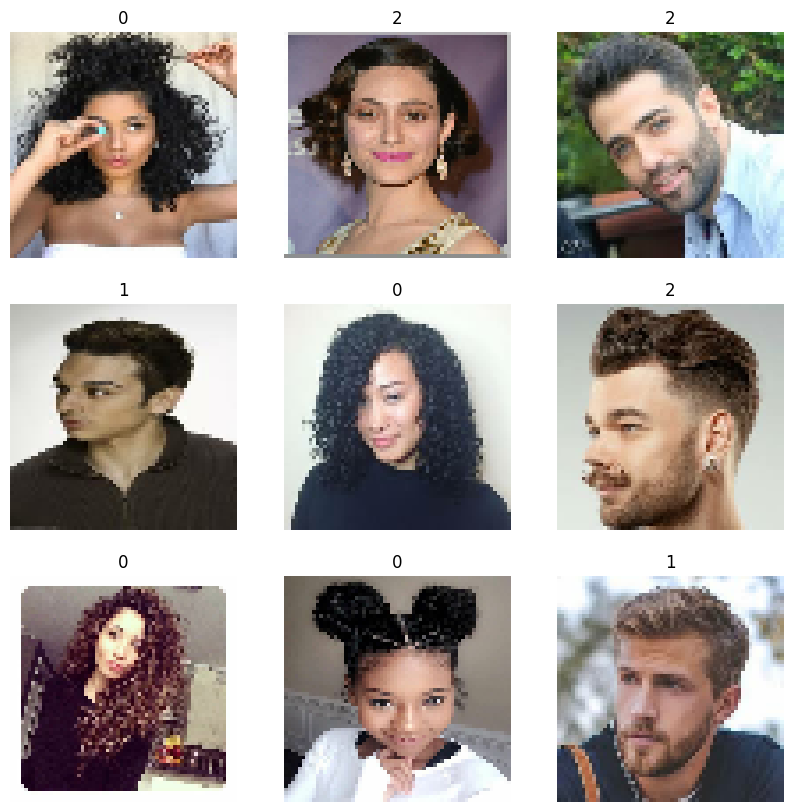

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
import pydot as pydot

model = Sequential()
model.add(keras.Input(shape=image_size + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

tf.keras.utils.plot_model(model, to_file='model_test.png', show_shapes=True)

epochs = 50

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3448 - loss: 1.0999 - val_accuracy: 0.2843 - val_loss: 1.0990
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.3683 - loss: 1.0973 - val_accuracy: 0.2843 - val_loss: 1.0978
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3579 - loss: 1.0871 - val_accuracy: 0.3249 - val_loss: 1.0841
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.4112 - loss: 1.0556 - val_accuracy: 0.3553 - val_loss: 1.0857
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.4394 - loss: 1.0483 - val_accuracy: 0.3909 - val_loss: 1.0795
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.4778 - loss: 1.0268 - val_accuracy: 0.3553 - val_loss: 1.1307
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.4535 - loss: 1.0377 - val_accuracy: 0.3959 - val_loss: 1.0683
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.4768 - loss: 1.0239 - val_accuracy: 0.3959 - v

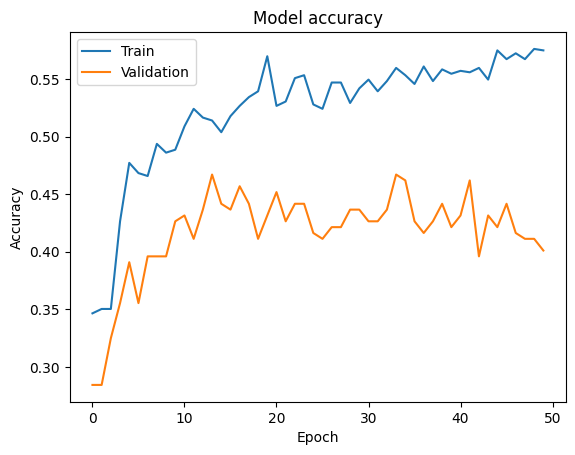

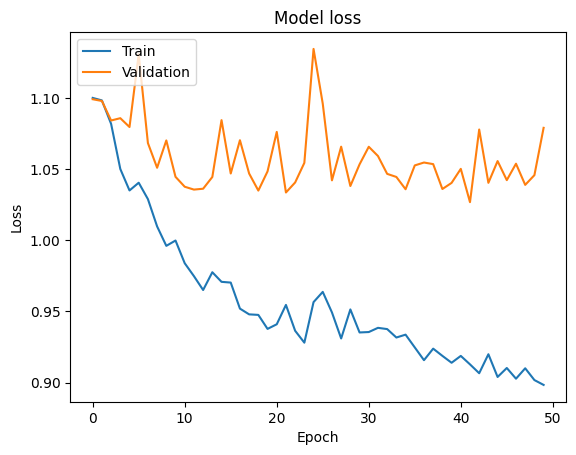

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [6]:
img = keras.preprocessing.image.load_img(
    "hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions[0])
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This image is 0.82 percent curly hair, 0.12 percent straight hair, and 0.07 percent wavy hair.
